### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')

#1. Análisis de facturación



In [3]:
#importar matplotlip
import matplotlib.pyplot as plt

%matplotlib inline

#Importando nunmpy
import numpy as np

Las tienda con mas ventas es la Tienda 1 con 1150.88 miles en  ventas
 y por el contrario la Tienda 4 con 1038.38 miles en ventas, y se muestra en el gráfico a continuación:   


[Text(0.5, 1.0, 'Ventas anuales por tienda'),
 Text(0.5, 0, 'Tiendas'),
 Text(0, 0.5, 'Ventas totales')]

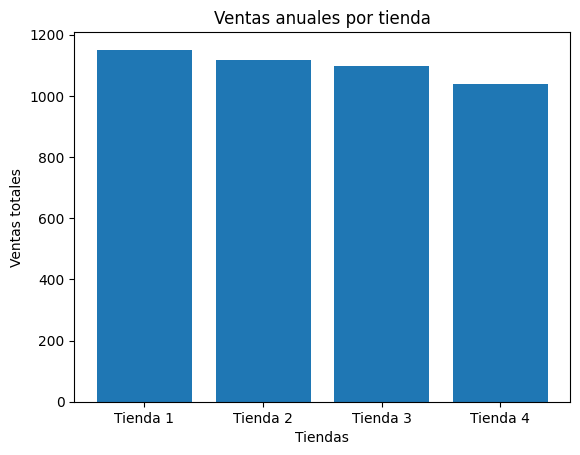

In [4]:
#Ventas totales por tienda
#Funcion para sacar las ventas totales por tienda

def facturar (tienda):
  return round(tienda["Precio"].sum()/1e6 ,2)
facturar(tienda)

#Aplicando la función a tienda

ventas_tienda1 = facturar(tienda)
ventas_tienda2 = facturar(tienda2)
ventas_tienda3 = facturar(tienda3)
ventas_tienda4 = facturar(tienda4)


#Organizando datos en listas
tiendasdict = {"Tienda 1": ventas_tienda1, "Tienda 2": ventas_tienda2, "Tienda 3": ventas_tienda3, "Tienda 4": ventas_tienda4}

#Tiendas con mas y menos ventas
tiendamasventas = max(tiendasdict, key=tiendasdict.get)
tiendamenosventas = min(tiendasdict, key=tiendasdict.get)


#leyenda con tiendas con mas ventas-menos ventas y sus respectivas ventas

print(f"Las tienda con mas ventas es la {tiendamasventas} con {tiendasdict[tiendamasventas]} miles en  ventas\n y por el contrario la {tiendamenosventas} con {tiendasdict[tiendamenosventas]} miles en ventas, y se muestra en el gráfico a continuación:   ")

#gráfico de barras representando las ventas de cada tienda

fig, ax = plt.subplots()
ax.bar(tiendasdict.keys(), tiendasdict.values())
#Configurando detalles del gráfico
ax.set(title="Ventas anuales por tienda", xlabel="Tiendas", ylabel="Ventas totales")










# 2. Ventas por categoría

In [5]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


In [ ]:
tienda.groupby("Categoría del Producto").size()

,0
Categoría del Producto,
Artículos para el hogar,171
Deportes y diversión,284
Electrodomésticos,312
Electrónicos,448
Instrumentos musicales,182
Juguetes,324
Libros,173
Muebles,465


None


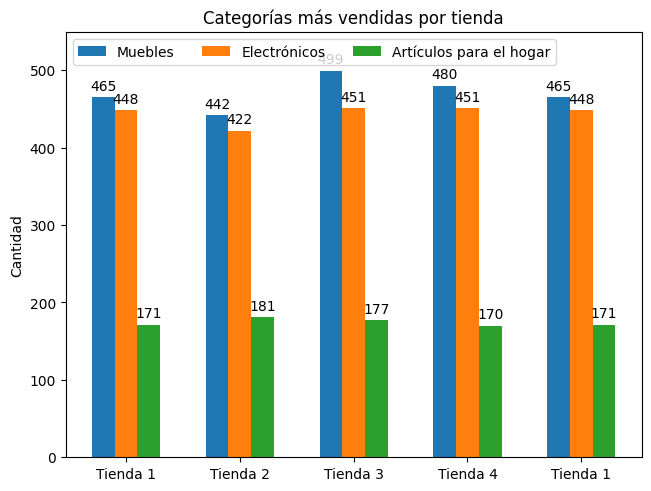

In [6]:
#Función para revisar por cada tienda categorias mas vendidas
cat_por_tienda = []
def analisiscategoria(tienda, nombre_tienda):
  resultado = tienda.groupby("Categoría del Producto").size().sort_values(ascending =False)
  productoestrella2 = resultado.head(2)  #Sacando los dos productos mas populares
  productomenosvendido = resultado.tail(1) #Sacando el producto menos populares
  productoselegidos = pd.concat([productoestrella2,productomenosvendido])
  cat_por_tienda.append([nombre_tienda, productoselegidos.index, productoselegidos.values]) # Agregamos los nombres de las categorias



#Llamando la función
analisiscategoria(tienda, "Tienda 1")
analisiscategoria(tienda2,"Tienda 2")
analisiscategoria(tienda3,"Tienda 3")
analisiscategoria(tienda4,"Tienda 4")

print(analisiscategoria(tienda,"Tienda 1"))

# Ajustamos para graficar cada categoria por separado
num_categorias = len(cat_por_tienda[0][2])  # Número de categorías en la primera tienda
x = np.arange(len(cat_por_tienda))  # etiquetas en x (tiendas)
width = 0.2  # Ancho de las barras, ajustado para 3 categorias

fig, ax = plt.subplots(layout='constrained')

for i in range(num_categorias): # Iteramos por las 3 categorias
    valores = [tienda[2][i] for tienda in cat_por_tienda] #Valores para cada categoria en cada tienda
    rects = ax.bar(x + i * width, valores, width, label=cat_por_tienda[0][1][i])  #Usamos el nombre de la categoria como etiqueta
    ax.bar_label(rects, padding=3)

#Configuracipn de etiquetas
ax.set_ylabel('Cantidad') # Cambiamos la etiqueta del eje y
ax.set_title('Categorías más vendidas por tienda') # Cambiamos el titulo
ax.set_xticks(x + width, [tienda[0] for tienda in cat_por_tienda]) #Usamos el nombre de la tienda
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(max(tienda[2]) for tienda in cat_por_tienda) + 50)

plt.show()

# 3. Calificación promedio de la tienda


In [7]:
tienda

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111


{'Tienda 1': np.float64(3.98), 'Tienda 2': np.float64(4.04), 'Tienda 3': np.float64(4.05), 'Tienda 4': np.float64(4.0)}


[Text(0.5, 1.0, 'Calificación global por tienda'),
 Text(0.5, 0, 'Tiendas'),
 Text(0, 0.5, 'Puntaje obtenido')]

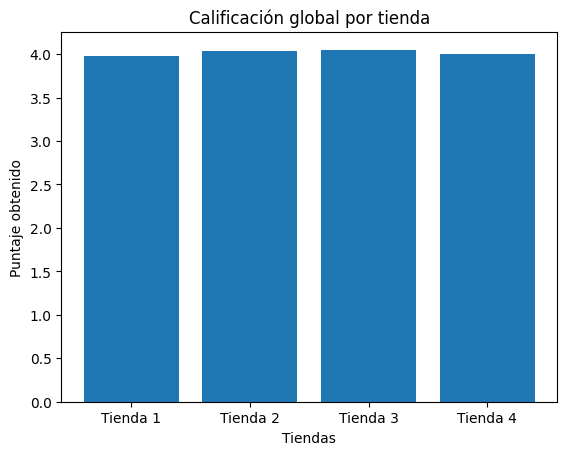

In [41]:
#Función para extraer las calificaciones de los usaarios
calificaciones = []


def calificacion (tienda):
  valor = tienda.groupby("Calificación").size().sort_index(ascending=False) #Primero extrae las calificacionees
  totalcalificaciones = valor.sum()
  puntajeglobal = 0

  for estrellas, cantidad in valor.items():
    puntajeglobal += estrellas * cantidad
  return calificaciones.append(round(puntajeglobal/totalcalificaciones,2))

#Llamando la función para todas las tiendas

calificacion(tienda)
calificacion(tienda2)
calificacion(tienda3)
calificacion(tienda4)


#Para graficar las calificaciones en tiendas

dicdecalif = {f"Tienda {i + 1}": calificaciones[i] for i in range(len(calificaciones))}

print(dicdecalif)

#gráfico de barras representando las calificaciones de cada tienda

fig, ax = plt.subplots()
ax.bar(dicdecalif.keys(), dicdecalif.values())
#Configurando detalles del gráfico
ax.set(title="Calificación global por tienda", xlabel="Tiendas", ylabel="Puntaje obtenido")








# 4. Productos más y menos vendidos

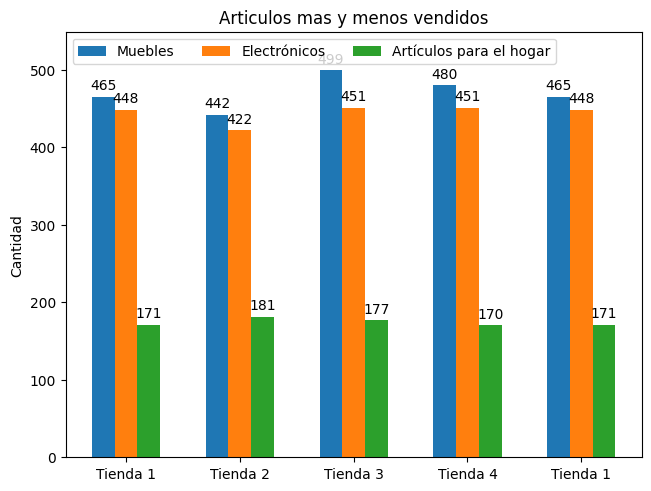

In [43]:
fig, ax = plt.subplots(layout='constrained')

for i in range(num_categorias): # Iteramos por las 3 categorias
    valores = [tienda[2][i] for tienda in cat_por_tienda] #Valores para cada categoria en cada tienda
    rects = ax.bar(x + i * width, valores, width, label=cat_por_tienda[0][1][i])  #Usamos el nombre de la categoria como etiqueta
    ax.bar_label(rects, padding=3)

#Configuracipn de etiquetas
ax.set_ylabel('Cantidad') # Cambiamos la etiqueta del eje y
ax.set_title('Articulos mas y menos vendidos') # Cambiamos el titulo
ax.set_xticks(x + width, [tienda[0] for tienda in cat_por_tienda]) #Usamos el nombre de la tienda
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, max(max(tienda[2]) for tienda in cat_por_tienda) + 50)

plt.show()

# 5. Envío promedio por tienda

Las tienda con mas gastos en envíos es la Tienda 1 con 61.38 miles
 y por el contrario la Tienda 4 con 1038.38 miles en envíos, y se muestra en el gráfico a continuación:   


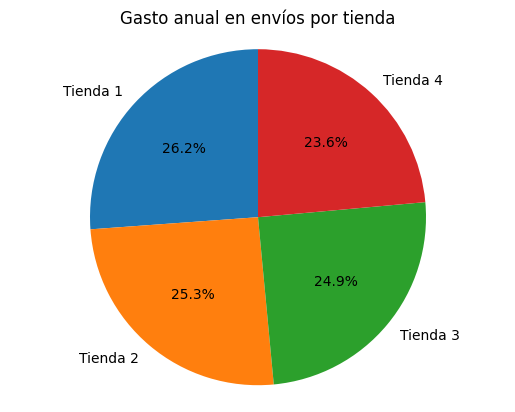

In [49]:
#Costo de envíos por tienda
#Funcion para sacar los gastos totales por tienda

def facturarenvio (tienda):
  return round(tienda["Costo de envío"].sum()/1e6 ,2)

#Aplicando la función a tienda

envio_tienda1 = facturarenvio(tienda)
envio_tienda2 = facturarenvio(tienda2)
envio_tienda3 = facturarenvio(tienda3)
envio_tienda4 = facturarenvio(tienda4)


#Organizando datos en listas
dicenvios = {"Tienda 1": envio_tienda1, "Tienda 2": envio_tienda2, "Tienda 3": envio_tienda3, "Tienda 4": envio_tienda4}

#Tiendas con mas y menos ventas
enviosmax = max(dicenvios, key=dicenvios.get)
enviosmin = min(dicenvios, key=dicenvios.get)


#leyenda con tiendas con mas ventas-menos ventas y sus respectivas ventas

print(f"Las tienda con mas gastos en envíos es la {enviosmax} con {dicenvios[enviosmax]} miles\n y por el contrario la {tiendamenosventas} con {tiendasdict[tiendamenosventas]} miles en envíos, y se muestra en el gráfico a continuación:   ")

# Gráfico de pastel
fig, ax = plt.subplots()
ax.pie(dicenvios.values(), labels=dicenvios.keys(), autopct='%1.1f%%', startangle=90)
ax.set_title("Gasto anual en envíos por tienda")
ax.axis('equal')  # Hace el pastel circular
plt.show()

In [ ]:
#Conclusión
"""
En este análisis hemos considerado cinco categorías principales:

1. Facturación total por tienda.
2. Categorías más vendidas por tienda.
3. Calificación promedio de la tienda.
4. Artículos más vendidos y menos vendidos por tienda.
5. Gasto anual en envíos por tienda.

Según los resultados obtenidos y mostrados en la primera gráfica de barras, observamos que la Tienda 1 registra la mayor facturación anual en comparación con el resto, mientras que la Tienda 4 presenta el menor volumen de ventas, lo que la convierte en la principal candidata para ser vendida.

Del análisis de los puntos 2 y 4 se identifican áreas de oportunidad: en cada tienda se podría optimizar el presupuesto, reduciendo la compra de artículos de baja rotación y destinando esos recursos a incrementar el inventario de los artículos más vendidos, impulsando así un mayor volumen de ventas.

Respecto al punto 3, se observan las siguientes conclusiones:
- La calificación promedio de la Tienda 1 (3.98 estrellas) es inferior a la de las otras tiendas. Se recomienda implementar estrategias de mejora en la atención al cliente, priorizando esta tienda para fortalecer su imagen y aumentar la satisfacción del cliente.
- En cambio, la Tienda 4 cuenta con una calificación promedio de 4 estrellas, lo cual puede ser utilizado como argumento favorable durante el proceso de negociación para su venta.

Finalmente, el análisis del gasto anual en envíos muestra que la Tienda 4 también tiene el menor volumen de ventas en línea.

**Conclusión final:**
La Tienda 4, basándonos en su facturación anual, es la opción recomendada para ser vendida. Sin embargo, sigue representando una excelente oportunidad de negocio y resulta atractiva y rentable para futuros compradores.

"""